In [133]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
gender = pd.read_csv('titanic/gender_submission.csv')

In [135]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [136]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
train = train.dropna()

In [138]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


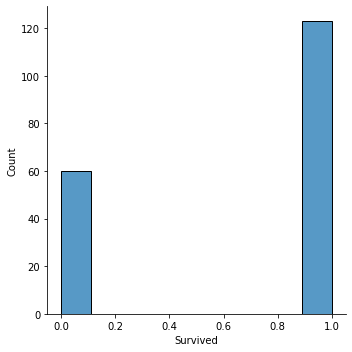

In [139]:
sns.displot(train['Survived'])

In [31]:
#Where 1 is survivors

In [140]:
survival_count = train['Survived'].value_counts()
survival_count

1    123
0     60
Name: Survived, dtype: int64

In [141]:
survival_perc = survival_count/len(train)
survival_perc

1    0.672131
0    0.327869
Name: Survived, dtype: float64

In [142]:
df = pd.DataFrame(train)


In [143]:
df = df.drop(columns='Survived')

In [144]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [145]:
combi = df.append(test)

In [146]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 1 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  601 non-null    int64  
 1   Pclass       601 non-null    int64  
 2   Name         601 non-null    object 
 3   Sex          601 non-null    object 
 4   Age          515 non-null    float64
 5   SibSp        601 non-null    int64  
 6   Parch        601 non-null    int64  
 7   Ticket       601 non-null    object 
 8   Fare         600 non-null    float64
 9   Cabin        274 non-null    object 
 10  Embarked     601 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 56.3+ KB


In [129]:
combi.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [147]:
combi.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [148]:
combi.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

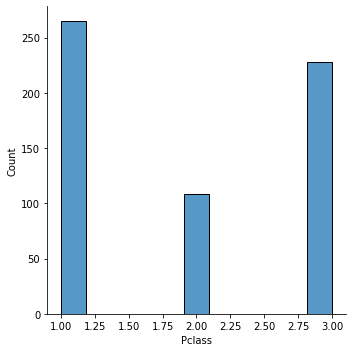

In [92]:
sns.displot(combi['Pclass'])

In [93]:
# Where 1 = 1st , 2 = 2nd , 3 = 3rd

In [95]:
p_count = combi['Pclass'].value_counts()
p_count

1    265
3    228
2    108
Name: Pclass, dtype: int64

In [96]:
p_perc = p_count/len(combi)
p_perc

1    0.440932
3    0.379368
2    0.179700
Name: Pclass, dtype: float64

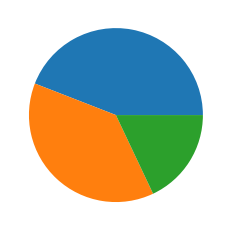

In [102]:
my_labels = ['1st', '2nd', '3rd']
plt.pie(p_perc, labels=my_labels, textprops={'color':'w'})
plt.show()

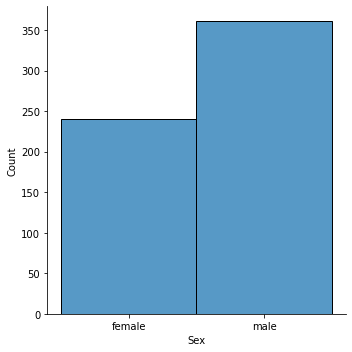

In [103]:
sns.displot(combi['Sex'])

In [246]:
combi['Sex'].replace({'female':0, 'male':1}, inplace=True)

/Users/ruthamey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [105]:
combi['Sex']

1      0
3      0
6      1
10     0
11     0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 601, dtype: int64

In [108]:
sex_count= combi['Sex'].value_counts()
sex_count

1    361
0    240
Name: Sex, dtype: int64

In [110]:
sex_perc = sex_count/len(combi)
sex_perc

1    0.600666
0    0.399334
Name: Sex, dtype: float64

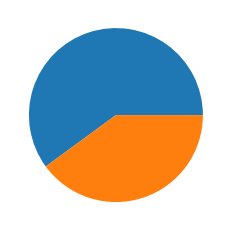

In [111]:
my_labels = ['female', 'male']
plt.pie(sex_perc, labels=my_labels, textprops={'color':'w'})
plt.show()

In [240]:
combi['Sex'] = combi['Sex'].astype(int)
combi['Sex']

<ipython-input-240-31ee5573d794>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combi['Sex'] = combi['Sex'].astype(int)


1      0
3      0
6      1
10     0
11     0
      ..
404    1
405    1
407    1
411    0
414    0
Name: Sex, Length: 270, dtype: int64

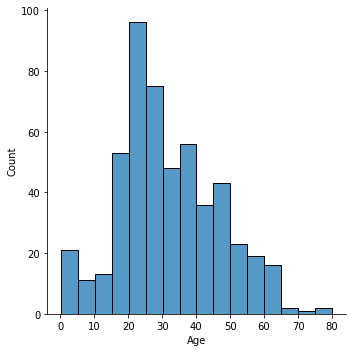

In [150]:
sns.displot(combi['Age'])

In [160]:
#combi['Age'][combi['Age'] == ' NaN'] = combi['Age'].mean()

combi = combi.dropna(subset=['Age'])

In [161]:
combi['Age']

1      38.0
3      35.0
6      54.0
10      4.0
11     58.0
       ... 
409     3.0
411    37.0
412    28.0
414    39.0
415    38.5
Name: Age, Length: 515, dtype: float64

In [162]:
combi['Age'] = pd.cut(x=combi['Age'], bins=[-1,18,40,65,100], labels=['child', 'young adult', 'middle age', 'pensioner'])
combi['Age']

1      young adult
3      young adult
6       middle age
10           child
11      middle age
          ...     
409          child
411    young adult
412    young adult
414    young adult
415    young adult
Name: Age, Length: 515, dtype: category
Categories (4, object): ['child' < 'young adult' < 'middle age' < 'pensioner']

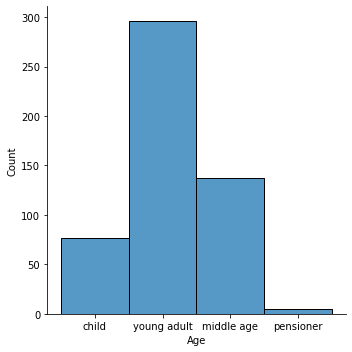

In [163]:
sns.displot(combi['Age'])

In [179]:
combi['Age'].replace({"young adult":1, "child":2, "middle age":3, "pensioner":4}, inplace=True)
combi['Age']

1      1
3      1
6      3
10     2
11     3
      ..
409    2
411    1
412    1
414    1
415    1
Name: Age, Length: 515, dtype: int64

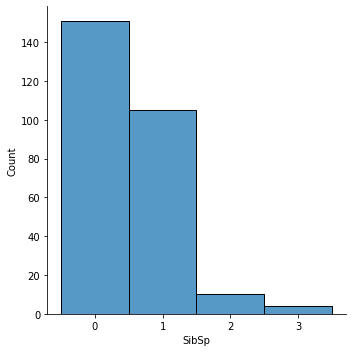

In [221]:
sns.displot(combi['SibSp'])

In [222]:
sibling_count = combi['SibSp'].value_counts()
sibling_count

0    151
1    105
2     10
3      4
4      0
Name: SibSp, dtype: int64

In [223]:
sibling_perc = sibling_count / len(combi)
sibling_perc

0    0.559259
1    0.388889
2    0.037037
3    0.014815
4    0.000000
Name: SibSp, dtype: float64

<ipython-input-224-da92576bf42d>:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(sibling_perc, labels = my_labels, textprops={'color':'w'})


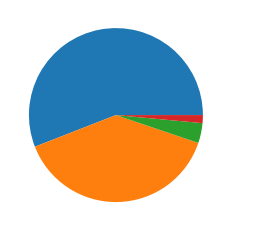

In [224]:
my_labels = ['0 Siblings', '1 Sibling', '2 Siblings', '3 Siblings', '4 Siblings']
plt.pie(sibling_perc, labels = my_labels, textprops={'color':'w'})
plt.show()

In [227]:
combi['SibSp'] = combi['SibSp'].astype(int)
combi['SibSp']

<ipython-input-227-0f814d52263f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combi['SibSp'] = combi['SibSp'].astype(int)


1      1
3      1
6      0
10     1
11     0
      ..
404    1
405    0
407    1
411    1
414    0
Name: SibSp, Length: 270, dtype: int64

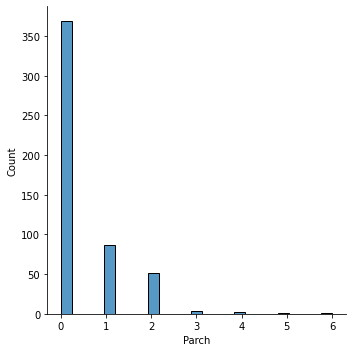

In [184]:
sns.displot(combi['Parch'])

In [186]:
count_parch = combi['Parch'].value_counts()
count_parch

0    369
1     87
2     52
3      3
4      2
5      1
6      1
Name: Parch, dtype: int64

In [187]:
count_per = count_parch/len(combi)
count_per

0    0.716505
1    0.168932
2    0.100971
3    0.005825
4    0.003883
5    0.001942
6    0.001942
Name: Parch, dtype: float64

<ipython-input-192-eaae62f4abdc>:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(count_per, labels=my_labels, textprops={'color':'w'})


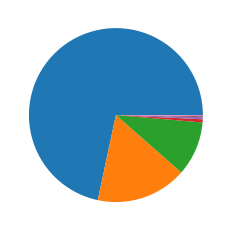

In [192]:
my_labels = ['0', '1', '2', '3', '4', '5', '6']
plt.pie(count_per, labels=my_labels, textprops={'color':'w'})
plt.show()

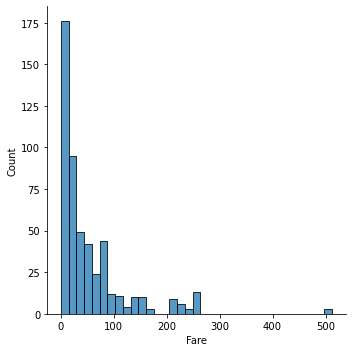

In [194]:
sns.displot(combi['Fare'])

In [195]:
combi['Fare'] = pd.cut(x=combi['Fare'], bins=[-1,50,100,200,600], labels=['low', 'medium', 'high', 'expensive'])
combi['Fare']

1      medium
3      medium
6      medium
10        low
11        low
        ...  
409       low
411    medium
412       low
414      high
415       low
Name: Fare, Length: 515, dtype: category
Categories (4, object): ['low' < 'medium' < 'high' < 'expensive']

In [198]:
fare_count = combi['Fare'].value_counts()
fare_count

low          327
medium       115
high          38
expensive     34
Name: Fare, dtype: int64

In [199]:
fare_perc = fare_count / len(combi)
fare_perc

low          0.634951
medium       0.223301
high         0.073786
expensive    0.066019
Name: Fare, dtype: float64

<ipython-input-201-b72a31b366dc>:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(fare_perc, labels=my_labels, textprops={'color':'w'})


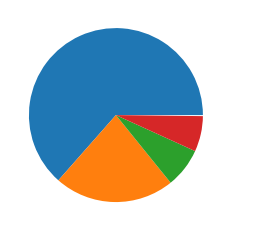

In [201]:
my_labels = ['low', 'medium', 'high', 'expensive']
plt.pie(fare_perc, labels=my_labels, textprops={'color':'w'})
plt.show()

In [204]:
combi['Fare'].replace({'low':1, 'medium':2, 'high':3, 'expensive':4}, inplace=True)

In [208]:
combi = combi.dropna(subset=['Cabin'])

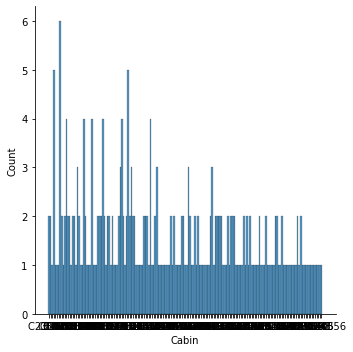

In [209]:
sns.displot(combi['Cabin'])

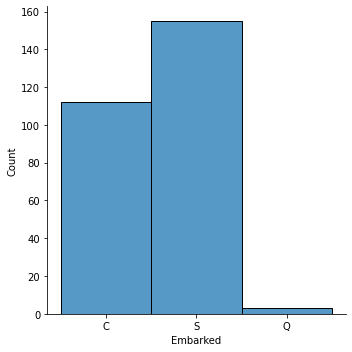

In [211]:
sns.displot(combi['Embarked'])

In [212]:
em_count = combi['Embarked'].value_counts()
em_count

S    155
C    112
Q      3
Name: Embarked, dtype: int64

In [214]:
em_perc = em_count / len(combi)
em_perc

S    0.574074
C    0.414815
Q    0.011111
Name: Embarked, dtype: float64

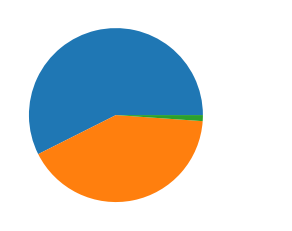

In [216]:
my_labels = ['Cherbourg', 'Queenstown', 'Southhampton']
plt.pie(em_perc, labels=my_labels, textprops={'color':'w'})
plt.show()

In [218]:
combi['Embarked'].replace({'C':1, 'S':2, 'Q':3}, inplace=True)

/Users/ruthamey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [219]:
combi['Embarked']

1      1
3      2
6      2
10     2
11     2
      ..
404    1
405    1
407    1
411    3
414    1
Name: Embarked, Length: 270, dtype: int64

In [228]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 1 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  270 non-null    int64  
 1   Pclass       270 non-null    int64  
 2   Name         270 non-null    object 
 3   Sex          270 non-null    object 
 4   Age          270 non-null    int64  
 5   SibSp        270 non-null    int64  
 6   Parch        270 non-null    int64  
 7   Ticket       270 non-null    object 
 8   Fare         270 non-null    float64
 9   Cabin        270 non-null    object 
 10  Embarked     270 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 25.3+ KB


In [247]:
target = train['Survived']
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
y=target
X=combi[features][: len(train)]
X_test = combi[features][len(train) :]
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
12,1,0,1,1,0,2.0,2
14,1,0,3,1,0,2.0,2
24,1,0,3,1,3,4.0,1
26,1,0,1,0,1,2.0,1
28,1,1,3,0,0,1.0,2
...,...,...,...,...,...,...,...
404,1,1,3,1,0,1.0,1
405,2,1,1,0,0,1.0,1
407,1,1,3,1,1,4.0,1
411,1,0,1,1,0,2.0,3


<AxesSubplot:>

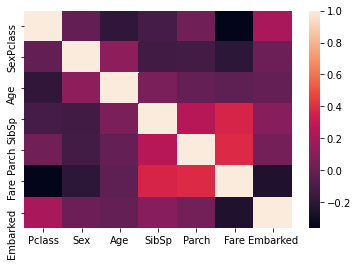

In [249]:
cmap = combi[features].corr()
sns.heatmap(cmap)

In [250]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((164, 7), (19, 7), (164,), (19,), (87, 7))

In [251]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, C=10).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.75


In [252]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.631578947368421


In [253]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_pred))

[[ 2  4]
 [ 3 10]]


In [254]:
predictions = model.predict(X_test)
predictions = predictions.astype(str)
predictions = np.char.replace(predictions, '0', 'False')
predictions = np.char.replace(predictions, '1', 'True')
predictions

array(['True', 'True', 'True', 'True', 'False', 'True', 'True', 'False',
       'True', 'True', 'True', 'False', 'True', 'True', 'True', 'True',
       'True', 'True', 'True', 'True', 'False', 'True', 'True', 'True',
       'False', 'True', 'True', 'True', 'True', 'True', 'False', 'False',
       'True', 'True', 'False', 'False', 'False', 'True', 'True', 'True',
       'True', 'True', 'False', 'False', 'True', 'False', 'True', 'True',
       'True', 'False', 'True', 'False', 'False', 'True', 'False', 'True',
       'True', 'False', 'True', 'False', 'False', 'True', 'False',
       'False', 'False', 'True', 'True', 'True', 'True', 'True', 'False',
       'True', 'True', 'True', 'False', 'True', 'False', 'True', 'True',
       'True', 'True', 'True', 'True', 'True', 'False', 'True', 'True'],
      dtype='<U5')

In [259]:
gender['Predictions'] = pd.Series(predictions)
gender.to_csv('gender_submission.csv', index=False)
my_submission = pd.read_csv('gender_submission.csv')
my_submission

,PassengerId,Survived,Predictions
0,892,0,True
1,893,1,True
2,894,0,True
3,895,0,True
4,896,1,False
...,...,...,...
413,1305,0,NaN
414,1306,1,NaN
415,1307,0,NaN
416,1308,0,NaN
